# Supervised Learning Chapter 2

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
! pip install sympy
import sympy
from scipy.linalg import lstsq

     |████████████████████████████████| 6.4 MB 972 kB/s eta 0:00:01
     |████████████████████████████████| 532 kB 827 kB/s eta 0:00:01


### Linear Squares: Scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq


Sample points of a function, research question

Does the OLS estimate give the taylor series approach







In [248]:
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])


def fun(x):
    return -0.02*x**6+0.033*x**5+0.5*x**4-0.3*x**3+x**2-6*x+37

y = fun(x)
print(y)

[36.40975031 35.83840928 35.28601561 34.753856   34.24446875 33.76163296
 33.31034333 32.89677056 32.52820735]


Given our polynomial guess we compose matrix M by taking x^k where k is the respective polynomial order

In [249]:
M = x[:, np.newaxis]**[1]
M

array([[0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9]])

Scipy implementation returns solution, residuals, rank of matrix M, and singular values

Note singular values of a matrix result from unitary diagonalization via LAPACK ls routines, number of singular values will correspond with rank of matrix

In [250]:
p, res, rnk, s = lstsq(M, y)
print("LS Solution is", p)
print("Sum of Squared Residuals is", round(res,2))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [53.18781106]
Sum of Squared Residuals is 2562.9
Rank of LS matrix is 1
Singular Values are [1.6881943]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

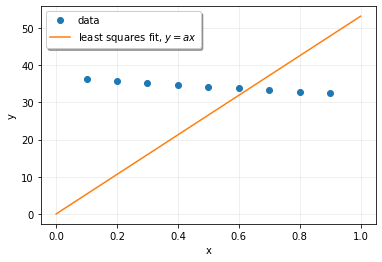

In [251]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 1, 101)
yy = p[0] *xx
plt.plot(xx, yy, label='least squares fit, $y = ax$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### Higher Order Polynomial, Note 6th degree polynomial can be exactly fitted with 7 points, 

We can still solve a least squares problem when fitting a nonlinear polynomial, this results directly from the vandermonde matrix

In [252]:
M = x[:, np.newaxis]**[0,1,2,3,4,5,6,7]
M

array([[1.000000e+00, 1.000000e-01, 1.000000e-02, 1.000000e-03,
        1.000000e-04, 1.000000e-05, 1.000000e-06, 1.000000e-07],
       [1.000000e+00, 2.000000e-01, 4.000000e-02, 8.000000e-03,
        1.600000e-03, 3.200000e-04, 6.400000e-05, 1.280000e-05],
       [1.000000e+00, 3.000000e-01, 9.000000e-02, 2.700000e-02,
        8.100000e-03, 2.430000e-03, 7.290000e-04, 2.187000e-04],
       [1.000000e+00, 4.000000e-01, 1.600000e-01, 6.400000e-02,
        2.560000e-02, 1.024000e-02, 4.096000e-03, 1.638400e-03],
       [1.000000e+00, 5.000000e-01, 2.500000e-01, 1.250000e-01,
        6.250000e-02, 3.125000e-02, 1.562500e-02, 7.812500e-03],
       [1.000000e+00, 6.000000e-01, 3.600000e-01, 2.160000e-01,
        1.296000e-01, 7.776000e-02, 4.665600e-02, 2.799360e-02],
       [1.000000e+00, 7.000000e-01, 4.900000e-01, 3.430000e-01,
        2.401000e-01, 1.680700e-01, 1.176490e-01, 8.235430e-02],
       [1.000000e+00, 8.000000e-01, 6.400000e-01, 5.120000e-01,
        4.096000e-01, 3.276800e-0

In [253]:
p, res, rnk, s = lstsq(M, y)
print("LS Solution is", p)
print("Sum of Residuals is", round(res,2))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [ 3.70000000e+01 -6.00000000e+00  1.00000000e+00 -3.00000000e-01
  5.00000000e-01  3.30000001e-02 -2.00000000e-02  8.66341902e-12]
Sum of Residuals is 0.0
Rank of LS matrix is 8
Singular Values are [3.75471681e+00 1.39091546e+00 3.73555358e-01 7.75631250e-02
 1.23762165e-02 1.44930406e-03 1.12649434e-04 4.65330405e-06]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

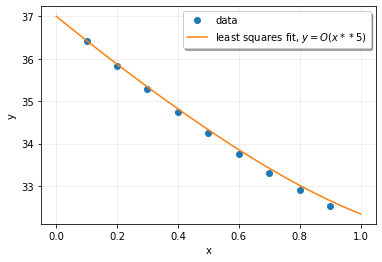

In [254]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 1, 100)
yy = p[0] +p[1]*xx+p[2]*xx**2+p[3]*xx**3+p[4]*xx**4+p[5]*xx*5+p[6]*xx**6+p[7]*xx**7
plt.plot(xx, yy, label='least squares fit, $y = O(x**5)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

In [255]:
from sympy import *                   # load all math functions
init_printing( use_latex='mathjax' )  # use pretty math output


In [256]:
fx = sympy.symbols('x', positive=True)
formula = -0.02*fx**6+0.33*fx**5+0.5*fx**4-0.3*fx**3+fx**2-6*fx+37
formula


        6         5        4        3    2           
- 0.02⋅x  + 0.33⋅x  + 0.5⋅x  - 0.3⋅x  + x  - 6⋅x + 37

### Taylor Series Expanded up to order 6 terms and evaluated on our range

- Assuming we evaluate the same taylor series then as long as expanded within our range interpolation is strong
- How about evaluating multiple taylor series -> Sequence at a collection of points


In [257]:
taylor=series( formula, fx, np.mean(x), 6 ).removeO()
evaltaylor = lambdify(fx, taylor, modules=['numpy'])
t = np.linspace(0, 1, 1000)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

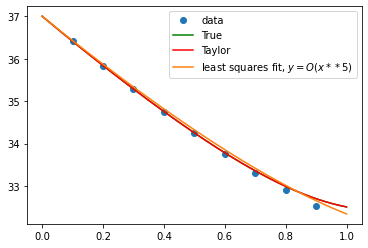

In [258]:
plt.plot(x, y, 'o', label='data')
plt.plot(t,-0.02*t**6+0.33*t**5+0.5*t**4-0.3*t**3+t**2-6*t+37,color='green',label='True')
plt.plot(t, evaltaylor(t), 'r', label='Taylor')
plt.plot(xx, yy, label='least squares fit, $y = O(x**5)$')
plt.legend(loc='best')
plt.show()

### Trignometric Ideas

In [259]:
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])


def fun(x):
    return np.sin(x)+np.cos(x)

y = fun(x)
print(y)

[1.09483758 1.17873591 1.2508567  1.31047934 1.3570081  1.38997809
 1.40905987 1.4140628  1.40493688]


In [260]:
M = x[:, np.newaxis]**[0,1,2,3,4,5,6,7]
M

array([[1.000000e+00, 1.000000e-01, 1.000000e-02, 1.000000e-03,
        1.000000e-04, 1.000000e-05, 1.000000e-06, 1.000000e-07],
       [1.000000e+00, 2.000000e-01, 4.000000e-02, 8.000000e-03,
        1.600000e-03, 3.200000e-04, 6.400000e-05, 1.280000e-05],
       [1.000000e+00, 3.000000e-01, 9.000000e-02, 2.700000e-02,
        8.100000e-03, 2.430000e-03, 7.290000e-04, 2.187000e-04],
       [1.000000e+00, 4.000000e-01, 1.600000e-01, 6.400000e-02,
        2.560000e-02, 1.024000e-02, 4.096000e-03, 1.638400e-03],
       [1.000000e+00, 5.000000e-01, 2.500000e-01, 1.250000e-01,
        6.250000e-02, 3.125000e-02, 1.562500e-02, 7.812500e-03],
       [1.000000e+00, 6.000000e-01, 3.600000e-01, 2.160000e-01,
        1.296000e-01, 7.776000e-02, 4.665600e-02, 2.799360e-02],
       [1.000000e+00, 7.000000e-01, 4.900000e-01, 3.430000e-01,
        2.401000e-01, 1.680700e-01, 1.176490e-01, 8.235430e-02],
       [1.000000e+00, 8.000000e-01, 6.400000e-01, 5.120000e-01,
        4.096000e-01, 3.276800e-0

In [261]:
p, res, rnk, s = lstsq(M, y)
print("LS Solution is", p)
print("Sum of Residuals is", round(res,2))
print("Rank of LS matrix is", rnk)
print("Singular Values are", s)

LS Solution is [ 9.99999975e-01  1.00000065e+00 -5.00006632e-01 -1.66631556e-01
  4.15591891e-02  8.52997697e-03 -1.59966987e-03 -7.86708667e-05]
Sum of Residuals is 0.0
Rank of LS matrix is 8
Singular Values are [3.75471681e+00 1.39091546e+00 3.73555358e-01 7.75631250e-02
 1.23762165e-02 1.44930406e-03 1.12649434e-04 4.65330405e-06]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

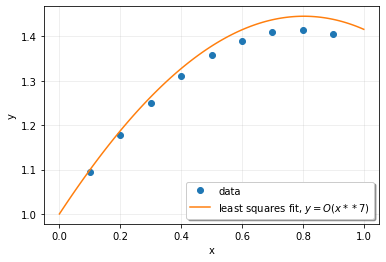

In [262]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 1, 100)
yy = p[0] +p[1]*xx+p[2]*xx**2+p[3]*xx**3+p[4]*xx**4+p[5]*xx*5+p[6]*xx**6+p[7]*xx**7
plt.plot(xx, yy, label='least squares fit, $y = O(x**7)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

In [263]:
fx = sympy.symbols('x', positive=True)
formula = sympy.sin(fx)+sympy.cos(fx)
formula


sin(x) + cos(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

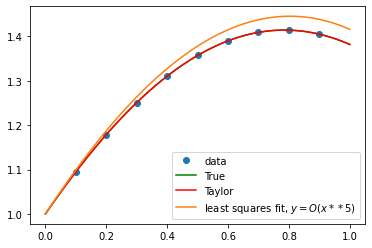

In [264]:
taylor=series( formula, fx, np.mean(x), 6 ).removeO()
evaltaylor = lambdify(fx, taylor, modules=['numpy'])
t = np.linspace(0, 1, 1000)
plt.plot(x, y, 'o', label='data')
plt.plot(t,np.sin(t)+np.cos(t),color='green',label='True')
plt.plot(t, evaltaylor(t), 'r', label='Taylor')
plt.plot(xx, yy, label='least squares fit, $y = O(x**5)$')
plt.legend(loc='best')
plt.show()

Taylor Series is near identical to actual function,

Least Squares system off sampled points is quite close too in both interpolation, extrapolation


In general this doesn't seem to be true take f(x)=sin(c+2*pi), least squares estimate will be sin(c)


Related to Norm? Natural norm for analytic functions